In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

In [13]:
lgbm = pd.read_csv("LGBM2.csv")
nb = pd.read_csv("NaiveBayes2.csv")
cb = pd.read_csv("CatBoost2.csv")
xgb = pd.read_csv("XGBoost2.csv")
dt = pd.read_csv("DecisionTree2.csv")
bgnb = pd.read_csv("BaggingNB2.csv")
bgdt = pd.read_csv("BaggingDT2.csv")
ada = pd.read_csv("AdaBoost2.csv")
rf = pd.read_csv("RandomForest2.csv")

In [3]:
test = pd.read_csv("task2_private_test_data.csv")

In [14]:
df = lgbm
df["CatBoost"] = cb.CatBoost
df["NaiveBayes"] = nb.NaiveBayes
df["XGBoost"] = xgb.XGBoost + 1
df["DecisionTree"] = dt.DecisionTree
df["BaggingNB"] = bgnb.BaggingNB
df["BaggingDT"] = bgdt.BaggingDT
df["AdaBoost"] = ada.AdaBoost
df["RandomForest"] = rf.RandomForest
df

,LightGBM,CatBoost,NaiveBayes,XGBoost,DecisionTree,BaggingNB,BaggingDT,AdaBoost,RandomForest
0,2,2,2,2.0,2,2,2,2,2
1,1,1,1,1.0,1,1,1,1,1
2,4,4,4,4.0,4,4,4,4,4
3,4,4,4,4.0,4,4,4,4,4
4,4,4,4,4.0,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...
1983477,2,2,2,2.0,2,2,2,2,2
1983478,2,2,2,2.0,2,2,2,2,2
1983479,3,3,3,3.0,3,3,3,3,3
1983480,2,2,2,2.0,2,2,2,2,2


In [22]:
modelsWeight = {
    "LightGBM": 1,
    "CatBoost": 1,
    # "NaiveBayes": 1,
    # "BaggingNB": 1,
    # "XGBoost": 1,
    # "DecisionTree": 1,
    # "BaggingDT": 1,
    # "AdaBoost": 1,
    "RandomForest": 1
}
    
def vote(row, i) :
    count = 0
    for key, value in modelsWeight.items():
        if row[key] == i :
            count += value
    return count

def finalAnswer(row) :
    predictions = []
    for key, value in modelsWeight.items():
        predictions.append(row[key])
    predictions.sort(reverse=True)
    return predictions[0]

df["One"] = df.apply(lambda row: vote(row, 1), axis=1)
df["Two"] = df.apply(lambda row: vote(row, 2), axis=1)
df["Three"] = df.apply(lambda row: vote(row, 3), axis=1)
df["Four"] = df.apply(lambda row: vote(row, 4), axis=1)
df["Final Prediction"] = df.apply(lambda row: finalAnswer(row), axis=1)

In [23]:
df["AnswerValue"] = test.AnswerValue

In [24]:
print('Voting ', accuracy_score(df["AnswerValue"], df["Final Prediction"]))
# Voting  0.6447706608882763
# Voting  0.6549366215574429

Voting  0.6518602135033239


In [25]:
print(classification_report(df["AnswerValue"], df["Final Prediction"], target_names=["A", "B", "C", "D"]))

              precision    recall  f1-score   support

           A       0.69      0.62      0.65    478895
           B       0.66      0.64      0.65    517881
           C       0.64      0.67      0.66    524238
           D       0.62      0.67      0.65    462468

    accuracy                           0.65   1983482
   macro avg       0.65      0.65      0.65   1983482
weighted avg       0.65      0.65      0.65   1983482



__________

<AxesSubplot:>

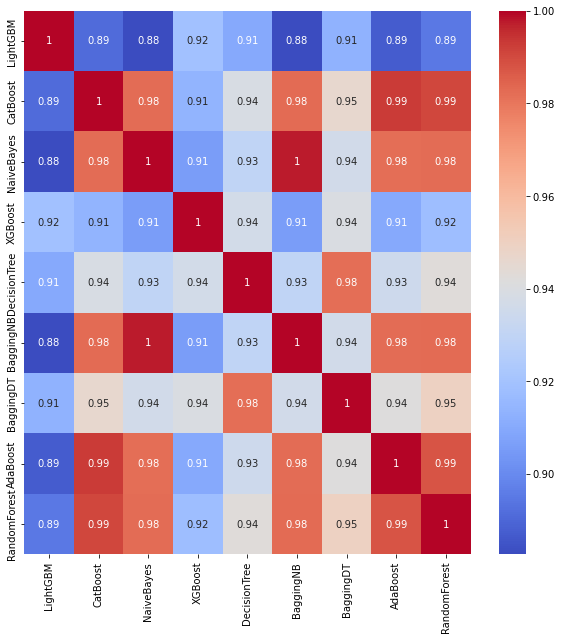

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<AxesSubplot:>

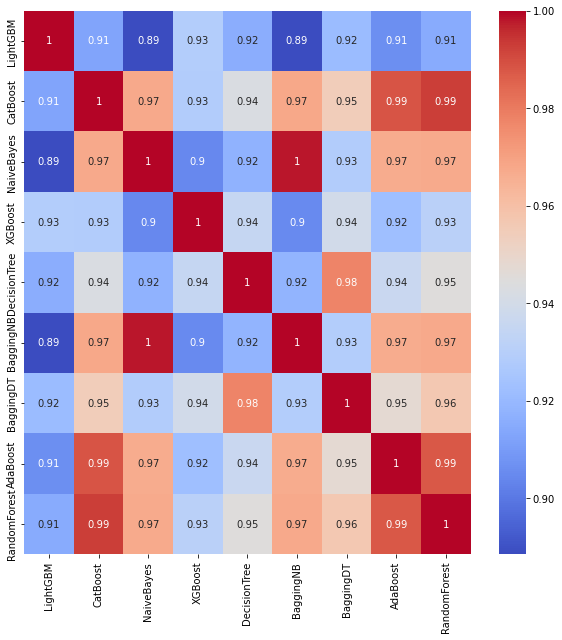

In [26]:
columns = [
    "LightGBM", "CatBoost", "NaiveBayes",
    "XGBoost", "DecisionTree", "BaggingNB",
    "BaggingDT", "AdaBoost", "RandomForest"
]
similarity = []

for i in range(0, len(columns)):
    row = []
    for j in range(0, len(columns)):
        row.append(accuracy_score(df[columns[i]], df[columns[j]]))
    similarity.append(row)

similarityDf = pd.DataFrame(similarity, columns=columns, index=columns)
plt.figure(figsize=(10, 10))
sns.heatmap(similarityDf, annot=True, cmap="coolwarm")

<AxesSubplot:>

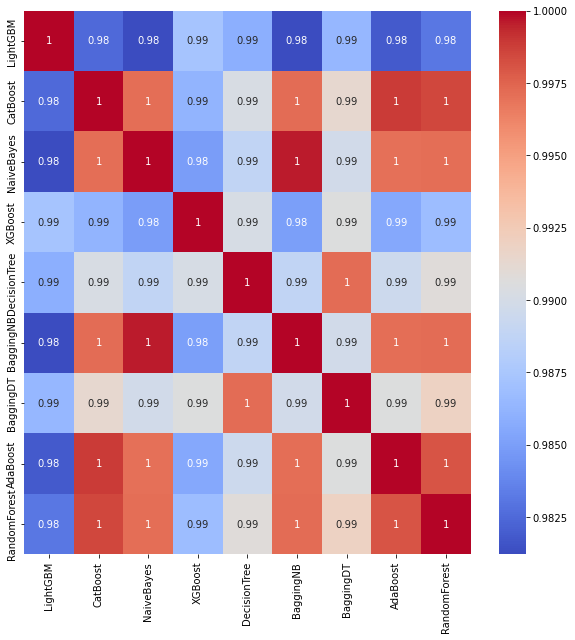

In [27]:
columns = [
    "LightGBM", "CatBoost", "NaiveBayes",
    "XGBoost", "DecisionTree", "BaggingNB",
    "BaggingDT", "AdaBoost", "RandomForest"
]
cosineSimilarity = []

for i in range(0, len(columns)):
    row = []
    for j in range(0, len(columns)):
        row.append(1 - spatial.distance.cosine(df[columns[i]], df[columns[j]]))
    cosineSimilarity.append(row)

cosineSimilarityDf = pd.DataFrame(cosineSimilarity, columns=columns, index=columns)
plt.figure(figsize=(10, 10))
sns.heatmap(cosineSimilarityDf, annot=True, cmap="coolwarm")